# Análise de conjunto de dados de uma livraria 
## Contexto: Trata-se de um conjunto de dados obtido através de uma raspagem de dados no kaggle, a qual a livraria não foi dita. O dataset é possui as seguintes colunas

- availability: Quantidade de avaliações.
- Category: Gênero do livro.
- Description: Uma breve descrição ou resumo do conteúdo do livro.
- Number of Reviews: O número total de avaliações que o livro recebeu de clientes.
- Price: O preço do livro, excluindo impostos e taxas adicionais.
- Price (Excluding Tax): O preço do livro antes de incluir quaisquer impostos aplicáveis.
- Price (Including Tax): O preço total do livro, incluindo impostos.
- Product Type: O tipo de produto, indicando que é um livro neste contexto.
- Stars: A classificação média do livro, geralmente representada em estrelas (por exemplo, 4,5 estrelas de 5).
- Tax: A quantia de imposto aplicada ao preço do livro.
- Title: O título ou nome do livro.
- UPC: O Código Universal de Produto, um identificador único para o livro.
- URL: O endereço da web (Uniform Resource Locator) onde o livro pode ser visualizado ou comprado online.

## Tópcios 
- Tratamento de dados
- Análise exploratória 
- Conclusão

In [54]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
#Carregando o conjunto de dados e carregando as 5 primeiras e 5 últimas linhas 
#Verificando número de linhas e colunas



df=pd.read_csv('bookdata.csv')

display(df)

,availability,category,description,num_reviews,price,price_excl_tax,price_incl_tax,product_type,stars,tax,title,upc,url
0,19,default,"Since her assault, Miss Annette Chetwynd has b...",0,13.99,13.99,13.99,books,2,0.0,"Since her assault, Miss Annette Chetwynd has b...",0312262ecafa5a40,https://books.toscrape.com/catalogue/starving-...
1,20,fiction,"Dans une France assez proche de la nôtre, un h...",0,50.10,50.10,50.10,books,1,0.0,"Dans une France assez proche de la nôtre, un h...",6957f44c3847a760,https://books.toscrape.com/catalogue/soumissio...
2,19,young adult,Patient Twenty-nine.A monster roams the halls ...,0,22.65,22.65,22.65,books,1,0.0,Patient Twenty-nine.A monster roams the halls ...,f77dbf2323deb740,https://books.toscrape.com/catalogue/the-requi...
3,20,history,From a renowned historian comes a groundbreaki...,0,54.23,54.23,54.23,books,5,0.0,From a renowned historian comes a groundbreaki...,4165285e1663650f,https://books.toscrape.com/catalogue/sapiens-a...
4,20,historical fiction,"""Erotic and absorbing...Written with starling ...",0,53.74,53.74,53.74,books,1,0.0,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,https://books.toscrape.com/catalogue/tipping-t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,nonfiction,"In her early thirties, Elizabeth Gilbert had e...",0,51.32,51.32,51.32,books,3,0.0,"In her early thirties, Elizabeth Gilbert had e...",df56868afd166557,https://books.toscrape.com/catalogue/eat-pray-...
994,1,classics,"'I never have been in love; it is not my way, ...",0,32.93,32.93,32.93,books,2,0.0,"'I never have been in love; it is not my way, ...",2e69730561ed70ad,https://books.toscrape.com/catalogue/emma_17/i...
995,1,default,Mary Shelley began writing Frankenstein when s...,0,38.00,38.00,38.00,books,2,0.0,Mary Shelley began writing Frankenstein when s...,a492f49a3e2b6a71,https://books.toscrape.com/catalogue/frankenst...
996,1,music,My Happily Ever After was turning into a livin...,0,28.80,28.80,28.80,books,3,0.0,My Happily Ever After was turning into a livin...,e564c3f1a93ccf2e,https://books.toscrape.com/catalogue/forever-r...


# Tratamento dos dados

In [34]:
 # Verificando tipos de dados e valores nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   availability    998 non-null    int64  
 1   category        998 non-null    object 
 2   description     998 non-null    object 
 3   num_reviews     998 non-null    int64  
 4   price           998 non-null    float64
 5   price_excl_tax  998 non-null    float64
 6   price_incl_tax  998 non-null    float64
 7   product_type    998 non-null    object 
 8   stars           998 non-null    int64  
 9   tax             998 non-null    float64
 10  title           998 non-null    object 
 11  upc             998 non-null    object 
 12  url             998 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 101.5+ KB


In [35]:
#Verificando soma das colunas númericas
print("Sum of 'availability':", df['availability'].sum())

print("Sum of 'price':", df['price'].sum())
print("Sum of 'price_excl_tax':", df['price_excl_tax'].sum())
print("Sum of 'price_incl_tax':", df['price_incl_tax'].sum())

print("Sum of 'num_reviews':", df['num_reviews'].sum())
print("Sum of 'tax':", df['tax'].sum())

Sum of 'availability': 8569
Sum of 'price': 34982.82
Sum of 'price_excl_tax': 34982.82
Sum of 'price_incl_tax': 34982.82
Sum of 'num_reviews': 0
Sum of 'tax': 0.0


In [36]:
# verifican os produtos
df.groupby('product_type')['stars'].sum()

product_type
books    2919
Name: stars, dtype: int64

### Colunas Retiradas : 
 - num_reviews : valor igual a  0 
 - tax : valor igual a 0 
 - description : Não irá ser utlizado
 - title : Repetição do description
 - upc : Não irá ser utilizado
 - product_type : só existe um tipo de produto
 - url : estão invalidas
 - prince_excl e incl : valores estão repetidos com o price  

In [37]:
df = df.drop('title',axis=1)
df = df.drop('num_reviews', axis=1)
df = df.drop('tax', axis=1)
df = df.drop('description', axis=1)
df = df.drop('upc', axis=1)
df = df.drop('product_type', axis=1)
df = df.drop('url', axis=1)
df = df.drop('price_incl_tax', axis=1)
df = df.drop('price_excl_tax', axis=1)

In [38]:
#Verificando a tabela
display(df)

,availability,category,price,stars
0,19,default,13.99,2
1,20,fiction,50.10,1
2,19,young adult,22.65,1
3,20,history,54.23,5
4,20,historical fiction,53.74,1
...,...,...,...,...
993,1,nonfiction,51.32,3
994,1,classics,32.93,2
995,1,default,38.00,2
996,1,music,28.80,3


# Análise exploratória 
- Quantidade de avaliações por categoria 
- Média de preço por categoria 
- Catégorias mais populares
- Categorias menos vendidas
- Média de preço por categoria
- Correlação do preço x avaliações


In [76]:
# Quantidade de avaliações por categoria

df.groupby('category')['availability'].sum().sort_values(ascending=False)

category
default               1330
nonfiction             975
sequential art         686
fiction                588
add a comment          516
young adult            464
fantasy                372
food and drink         319
mystery                290
romance                269
poetry                 235
childrens              229
historical fiction     194
history                181
horror                 136
business               133
science fiction        125
thriller               119
music                  111
science                105
womens fiction          91
travel                  89
humor                   84
philosophy              82
art                     72
spirituality            69
religion                60
self help               59
autobiography           57
christian fiction       55
classics                54
psychology              52
health                  49
new adult               49
politics                45
biography               43
christian          

In [64]:
# Média de preço por categoria 

print(df.groupby('category')['price'].mean().sort_values(ascending=False))


category
suspense              58.330000
novels                54.810000
politics              53.613333
health                51.452500
new adult             46.383333
christian             42.496667
sports and games      41.166000
self help             40.620000
travel                39.794545
fantasy               39.593958
art                   38.520000
parenting             37.350000
history               37.295000
autobiography         37.053333
womens fiction        36.791176
cultural              36.580000
contemporary          36.200000
fiction               36.066615
poetry                35.974211
horror                35.949412
short stories         35.880000
add a comment         35.796418
music                 35.636923
classics              35.490556
young adult           35.449074
spirituality          35.098333
sequential art        34.572267
default               34.408543
christian fiction     34.385000
nonfiction            34.260182
psychology            34.218571

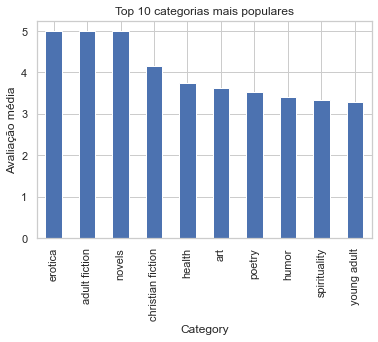

In [57]:
# Categoria mais populares

# Calculando as 10 maiores categorias 
df.groupby('category')['stars'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

# Adicionar rótulos e título
plt.xlabel('Category')
plt.ylabel('Avaliação média')
plt.title('Top 10 categorias mais populares')

# Exibir o gráfico
plt.show()

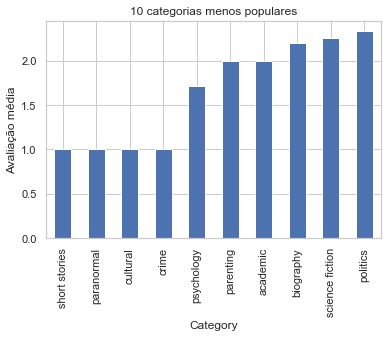

In [58]:
# Categoria mais populares

# Calculando as 10 menos categorias 
df.groupby('category')['stars'].mean().sort_values(ascending=True).head(10).plot(kind='bar')


plt.xlabel('Category')
plt.ylabel('Avaliação média')
plt.title('10 categorias menos populares')


plt.show()

In [79]:
#Correlação preços e Star

PrecoXStar = df['stars'].corr(df['price'], method='spearman')


print(PrecoXStar)

0.031176628944096


In [74]:
# Correlação avaliações x preço 
PrecoXAva = df['availability'].corr(df['price'], method='spearman')


print(PrecoXAva)

-0.010852605562350856
